# Importações

In [2]:
!pip install plotly

!pip install nbformat

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [6]:
import funcs as f
import pandas as pd
import math
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.express as px 
from matplotlib import pyplot as plt
import numpy as np

# Separando os dataframes e mapeando os sintomas

In [4]:
df_sivep = f.ler_planilha()

In [7]:
srag_influenza        = df_sivep[df_sivep['CLASSI_FIN'] == 1]
srag_outros_virus     = df_sivep[df_sivep['CLASSI_FIN'] == 2]
srag_outros_agentes   = df_sivep[df_sivep['CLASSI_FIN'] == 3]
srag_nao_especificado = df_sivep[df_sivep['CLASSI_FIN'] == 4]
covid                 = df_sivep[df_sivep['CLASSI_FIN'] == 5]

In [8]:
mapa_sintomas = {
    'NOSOCOMIAL',
    'AVE_SUINO',
    'FEBRE',
    'TOSSE',
    'GARGANTA',
    'DISPNEIA',
    'DESC_RESP',
    'SATURACAO',
    'DIARREIA',
    'VOMITO',
    'OUTRO_SIN'
}

# SRAG por influenza

In [10]:
df_srag = pd.DataFrame()
for coluna in srag_influenza.columns:
    if coluna in mapa_sintomas:
        df_srag[coluna] = srag_influenza[coluna]

In [11]:
for key in df_srag.keys():
    for linha in df_srag[key]:
        if math.isnan(linha):
            df_srag[key] = df_srag[key].replace(linha, 9)


In [12]:
df_srag

,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN
102,2.0,2.0,1.0,1.0,1.0,9.0,9.0,1.0,9.0,9.0,1.0
114,2.0,2.0,9.0,1.0,9.0,9.0,9.0,9.0,1.0,9.0,1.0
300,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0
411,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,9.0,9.0
425,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1966,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0
1977,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
1988,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,9.0
1998,2.0,2.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,9.0,9.0


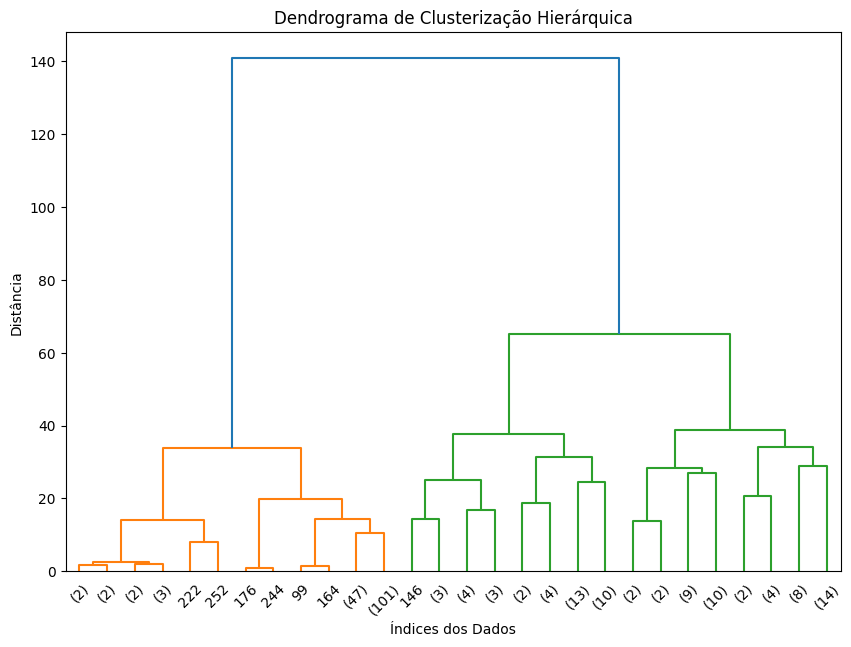

In [13]:
X = df_srag.to_numpy()

clustering = AgglomerativeClustering().fit(X)

Z = linkage(X, method='ward')

plt.figure(figsize=(10, 7))

dendrogram(Z,truncate_mode='level',p=4)
plt.title('Dendrograma de Clusterização Hierárquica')
plt.xlabel('Índices dos Dados')
plt.ylabel('Distância')
plt.show()

In [14]:
df_srag['cluster'] = clustering.labels_
df_srag['cluster'].value_counts()

cluster
1    163
0     91
Name: count, dtype: int64

In [15]:
fig = px.parallel_coordinates(df_srag, color='cluster',
                              dimensions=['NOSOCOMIAL', 'AVE_SUINO', 'FEBRE',
                                          'TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO',
                                          'DIARREIA','VOMITO','OUTRO_SIN'],
                              title='Parallel Plot - SRAG por Influenza')
fig.show()

# SRAG por outros vírus

In [16]:
df_srag_outros_v = pd.DataFrame()
for coluna in srag_outros_virus.columns:
    if coluna in mapa_sintomas:
        df_srag_outros_v[coluna] = srag_outros_virus[coluna]

In [17]:
for key in df_srag_outros_v.keys():
    for linha in df_srag_outros_v[key]:
        if math.isnan(linha):
            df_srag_outros_v[key] = df_srag_outros_v[key].replace(linha, 9)


In [18]:
df_srag_outros_v

,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN
6,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
30,2.0,2.0,9.0,9.0,9.0,1.0,1.0,1.0,9.0,9.0,9.0
79,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0
100,2.0,9.0,1.0,1.0,9.0,1.0,1.0,1.0,9.0,9.0,9.0
194,2.0,2.0,1.0,9.0,9.0,1.0,1.0,9.0,9.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1987,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0
1997,2.0,2.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,9.0,9.0
2000,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
2003,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0


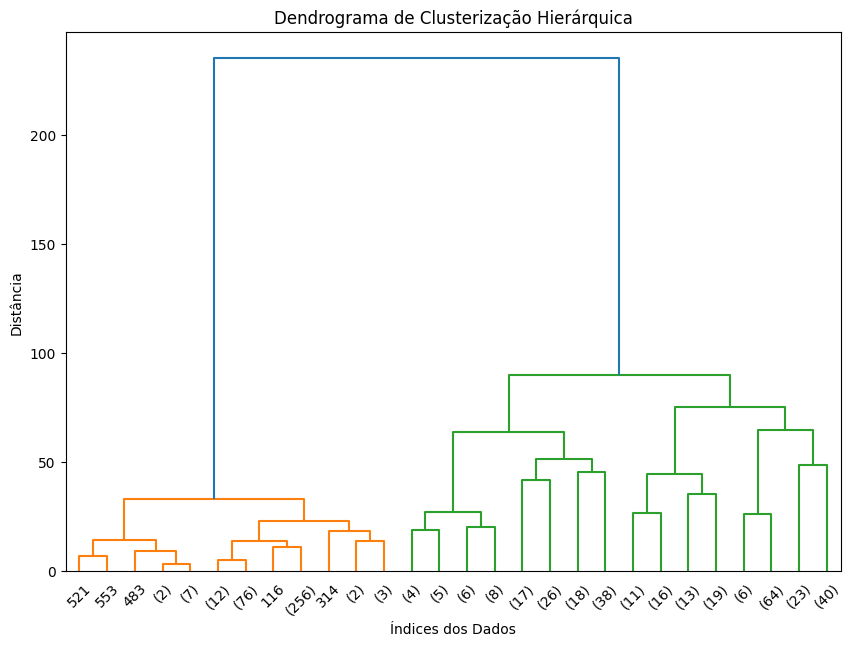

In [19]:
X = df_srag_outros_v.to_numpy()

clustering = AgglomerativeClustering().fit(X)

Z = linkage(X, method='ward')

plt.figure(figsize=(10, 7))

dendrogram(Z,truncate_mode='level',p=4)
plt.title('Dendrograma de Clusterização Hierárquica')
plt.xlabel('Índices dos Dados')
plt.ylabel('Distância')
plt.show()

In [20]:
df_srag_outros_v['cluster'] = clustering.labels_
df_srag_outros_v['cluster'].value_counts()

cluster
1    363
0    314
Name: count, dtype: int64

In [21]:
fig = px.parallel_coordinates(data_frame=df_srag_outros_v, 
                              color='cluster',
                              dimensions=['NOSOCOMIAL', 'AVE_SUINO', 'FEBRE',
                                          'TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO',
                                          'DIARREIA','VOMITO','OUTRO_SIN'],
                              title='Parallel Plot - SRAG Outros Vírus')
fig.show()

# SRAG por outro agente Etiológico

In [22]:
df_srag_outros_a = pd.DataFrame()
for coluna in srag_outros_agentes.columns:
    if coluna in mapa_sintomas:
        df_srag_outros_a[coluna] = srag_outros_agentes[coluna]

In [23]:
for key in df_srag_outros_a.keys():
    for linha in df_srag_outros_a[key]:
        if math.isnan(linha):
            df_srag_outros_a[key] = df_srag_outros_a[key].replace(linha, 9)


In [24]:
df_srag_outros_a

,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN
96,1.0,2.0,1.0,1.0,9.0,9.0,9.0,9.0,9.0,1.0,9.0
129,2.0,2.0,1.0,1.0,2.0,2.0,1.0,9.0,1.0,1.0,2.0
248,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,9.0
755,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
897,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0
1791,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0


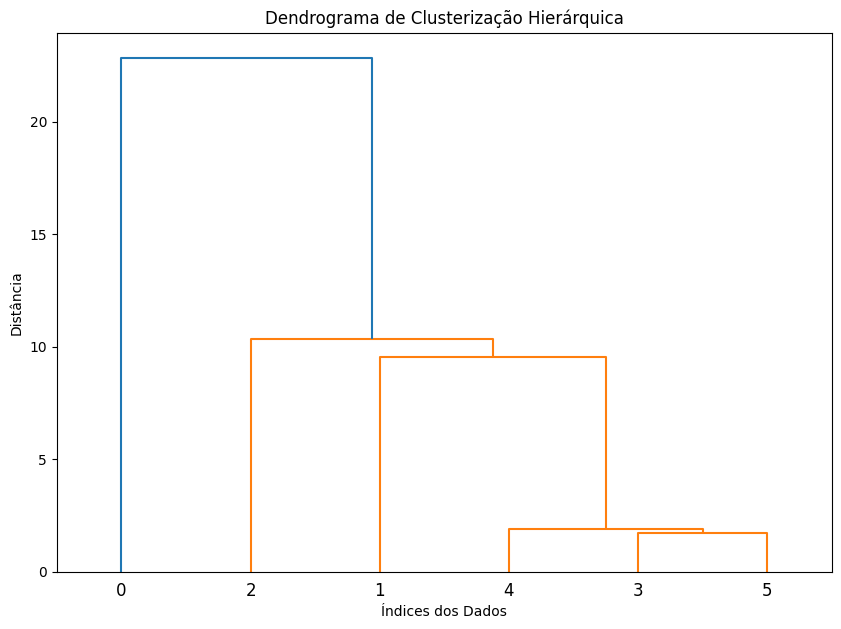

In [25]:
X = df_srag_outros_a.to_numpy()

clustering = AgglomerativeClustering().fit(X)

Z = linkage(X, method='ward')

plt.figure(figsize=(10, 7))

dendrogram(Z,truncate_mode='level',p=4)
plt.title('Dendrograma de Clusterização Hierárquica')
plt.xlabel('Índices dos Dados')
plt.ylabel('Distância')
plt.show()

In [26]:
df_srag_outros_a['cluster'] = clustering.labels_
df_srag_outros_a['cluster'].value_counts()

cluster
0    5
1    1
Name: count, dtype: int64

In [27]:
fig = px.parallel_coordinates(data_frame=df_srag_outros_a, 
                              color='cluster',
                              dimensions=['NOSOCOMIAL', 'AVE_SUINO', 'FEBRE',
                                          'TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO',
                                          'DIARREIA','VOMITO','OUTRO_SIN'],
                              title='Parallel Plot - SRAG Outros Vírus')
fig.show()

# SRAG SRAG não especificado

In [28]:
df_srag_nao_espec = pd.DataFrame()
for coluna in srag_nao_especificado.columns:
    if coluna in mapa_sintomas:
        df_srag_nao_espec[coluna] = srag_nao_especificado[coluna]

In [29]:
for key in df_srag_nao_espec.keys():
    for linha in df_srag_nao_espec[key]:
        if math.isnan(linha):
            df_srag_nao_espec[key] = df_srag_nao_espec[key].replace(linha, 9)


In [30]:
df_srag_nao_espec

,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN
0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
1,2.0,2.0,1.0,1.0,9.0,1.0,1.0,1.0,9.0,9.0,9.0
3,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
4,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
5,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1985,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0
1986,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0
1989,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
1991,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0


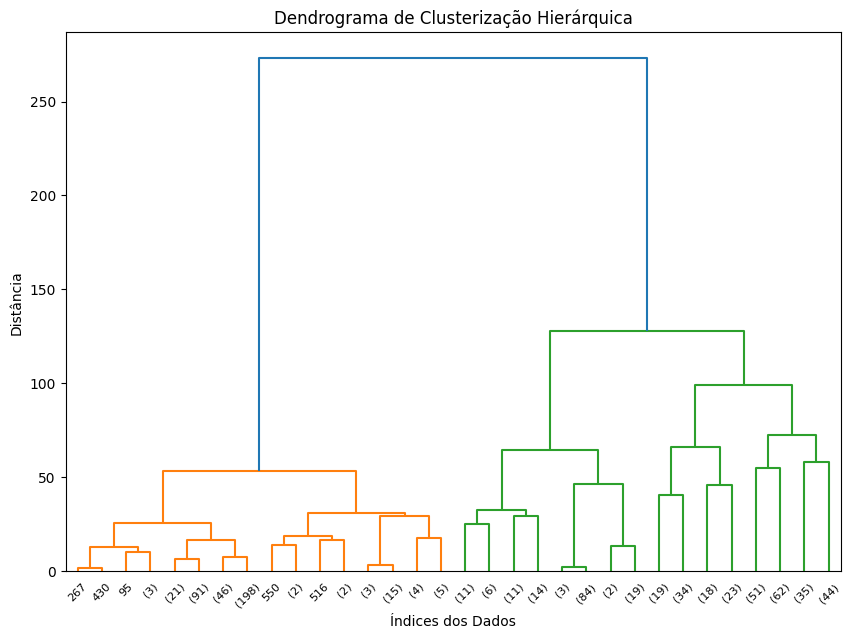

In [31]:
X = df_srag_nao_espec.to_numpy()

clustering = AgglomerativeClustering().fit(X)

Z = linkage(X, method='ward')

plt.figure(figsize=(10, 7))

dendrogram(Z,truncate_mode='level',p=4)
plt.title('Dendrograma de Clusterização Hierárquica')
plt.xlabel('Índices dos Dados')
plt.ylabel('Distância')
plt.show()

In [32]:
df_srag_nao_espec['cluster'] = clustering.labels_
df_srag_nao_espec['cluster'].value_counts()

cluster
0    436
1    395
Name: count, dtype: int64

In [33]:
fig = px.parallel_coordinates(data_frame=df_srag_nao_espec, 
                              color='cluster',
                              dimensions=['NOSOCOMIAL', 'AVE_SUINO', 'FEBRE',
                                          'TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO',
                                          'DIARREIA','VOMITO','OUTRO_SIN'],
                              title='Parallel Plot - SRAG Outros Vírus')
fig.show()

# SRAG por COVID-19

In [ ]:
df_covid = pd.DataFrame()
for coluna in covid.columns:
    if coluna in mapa_sintomas:
        df_covid[coluna] = covid[coluna]

In [ ]:
for key in df_covid.keys():
    for linha in df_covid[key]:
        if math.isnan(linha):
            df_covid[key] = df_covid[key].replace(linha, 9)


In [ ]:
df_covid

,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN
6,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
30,2.0,2.0,9.0,9.0,9.0,1.0,1.0,1.0,9.0,9.0,9.0
79,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0
100,2.0,9.0,1.0,1.0,9.0,1.0,1.0,1.0,9.0,9.0,9.0
194,2.0,2.0,1.0,9.0,9.0,1.0,1.0,9.0,9.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1987,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0
1997,2.0,2.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,9.0,9.0
2000,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
2003,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0


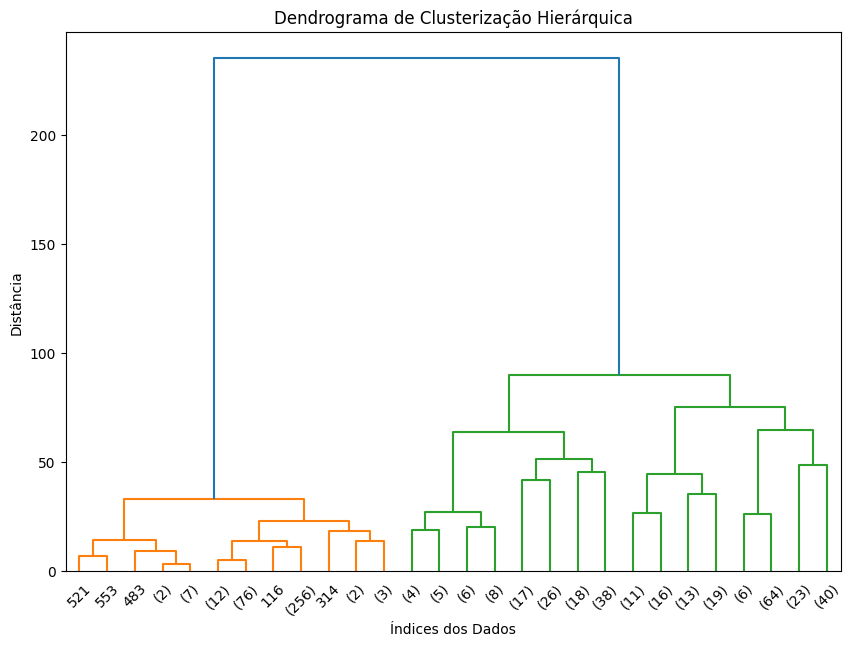

In [ ]:
X = df_covid.to_numpy()

clustering = AgglomerativeClustering().fit(X)

Z = linkage(X, method='ward')

plt.figure(figsize=(10, 7))

dendrogram(Z,truncate_mode='level',p=4)
plt.title('Dendrograma de Clusterização Hierárquica')
plt.xlabel('Índices dos Dados')
plt.ylabel('Distância')
plt.show()

In [ ]:
df_covid['cluster'] = clustering.labels_
df_covid['cluster'].value_counts()

cluster
1    363
0    314
Name: count, dtype: int64

In [ ]:
fig = px.parallel_coordinates(data_frame=df_covid, 
                              color='cluster',
                              dimensions=['NOSOCOMIAL', 'AVE_SUINO', 'FEBRE',
                                          'TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO',
                                          'DIARREIA','VOMITO','OUTRO_SIN'],
                              title='Parallel Plot - SRAG Outros Vírus')
fig.show()